# Visualizing Data
Visualizing data with the help of pyplot, and pandas, to be able to make sense  of what type of data is available from the san antonio dataset provided by RS21. The files that were graphed were traffic accidents, violent crime, and snap stores. 
These were graphed individually to provide more insight to the data. 
There was a problem making the graphs as the range of longitude and latitude of the violent crime and snap stores was too sparse. Therefore I had to make a query so that the data graphed would stay within the traffic accidents data. Otherwise the graph would be useless for visualization purposes. 


In [2]:
#To be able to run the various scripts,
#   this notebook was placed in the San Antonio/ CSV directory.
#   This was done to try to avoid any hardcoded path that would not work
#   in another computer. 

import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#shapecsv_path = os.path.join('E:','\Rod\Desktop\cs598\shpCSV\shape_TRAFFICACCIDENTS_1_2017_2017-12-06T115823_RKJ.csv')
TRAFFIC_PATH = os.path.join('E:', '\Rod\Desktop\cs598\shpCSV\shape_TRAFFICACCIDENTS_1_2017_2017-12-06T115823_RKJ.csv')
CRIME_PATH = os.path.join('E:', '\Rod\Desktop\cs598\shpCSV\shape_VIOLENTCRIME_1_2015_2017-12-09T125732_BKJ.csv')
SNAP_PATH = os.path.join('E:', '\Rod\Desktop\cs598\shpCSV\shape_PROXSNAPSTORES_1_2017_2017-12-05T220011_APG.csv')

How to load the data with gpd if you want to use geometry to also graph the data
In this case, it does not matter as we are only looking at points in a map, not areas.
Therefore I decided to only use the regular pandas library that has more options


In [4]:
#traffic_accidents = gpd.read_file(TRAFFIC_PATH)
#violent_crime = gpd.read_file(CRIME_PATH)
t_accidents= pd.read_csv(TRAFFIC_PATH)
v_crimes = pd.read_csv(CRIME_PATH)
snap_stores = pd.read_csv(SNAP_PATH)

These are the individual graphs for each dataframe. The same size and marker size for consistency were left to understand why some data were left out in the visualization. 

In [45]:
marker_size = 50
figure_size = (15, 15)
my_alpha = 0.5
# If you want to have graphs for each dataframe, this is the easiest way using pandas and pyplot together
#t_accidents.plot.scatter(x='lon', y='lat',marker='v', color='green', s=marker_size, title='Traffic Accidents', figsize=figure_size)
#v_crimes.plot.scatter(x='lon', y='lat',marker='v', color='blue', s=marker_size, title='Violent Crime', figsize=figure_size)
#snap_stores.plot.scatter(x='Longitude', y='Latitude',marker='v', color='Yellow', s=marker_size, title='Snap Stores', figsize=figure_size)

In [6]:
max_lon = t_accidents['lon'].max()
min_lon = t_accidents['lon'].min()
max_lat = t_accidents['lat'].max()
min_lat = t_accidents['lat'].min()

In [15]:
new_crime = v_crimes[v_crimes['lon'].apply(lambda x: min_lon < x < max_lon) & v_crimes['lat'].apply(lambda x: min_lat < x < max_lat)]
new_snap = snap_stores[snap_stores['Longitude'].apply(lambda x: min_lon < x < max_lon) & snap_stores['Latitude'].apply(lambda x: min_lat < x < max_lat)]
new_crime.describe()

,Unnamed: 0,GEO_ID,lat,lon
count,25769.000000,2.576900e+04,25769.000000,25769.000000
mean,12919.923396,9.312125e+07,29.453134,-98.519702
std,7476.002330,3.195511e+06,0.074354,0.081801
min,0.000000,8.741161e+07,29.162259,-98.800800
25%,6445.000000,9.010877e+07,29.401402,-98.578297
50%,12899.000000,9.340019e+07,29.441349,-98.516870
75%,19396.000000,9.576163e+07,29.508258,-98.460769
max,25893.000000,9.970673e+07,29.701713,-98.139391


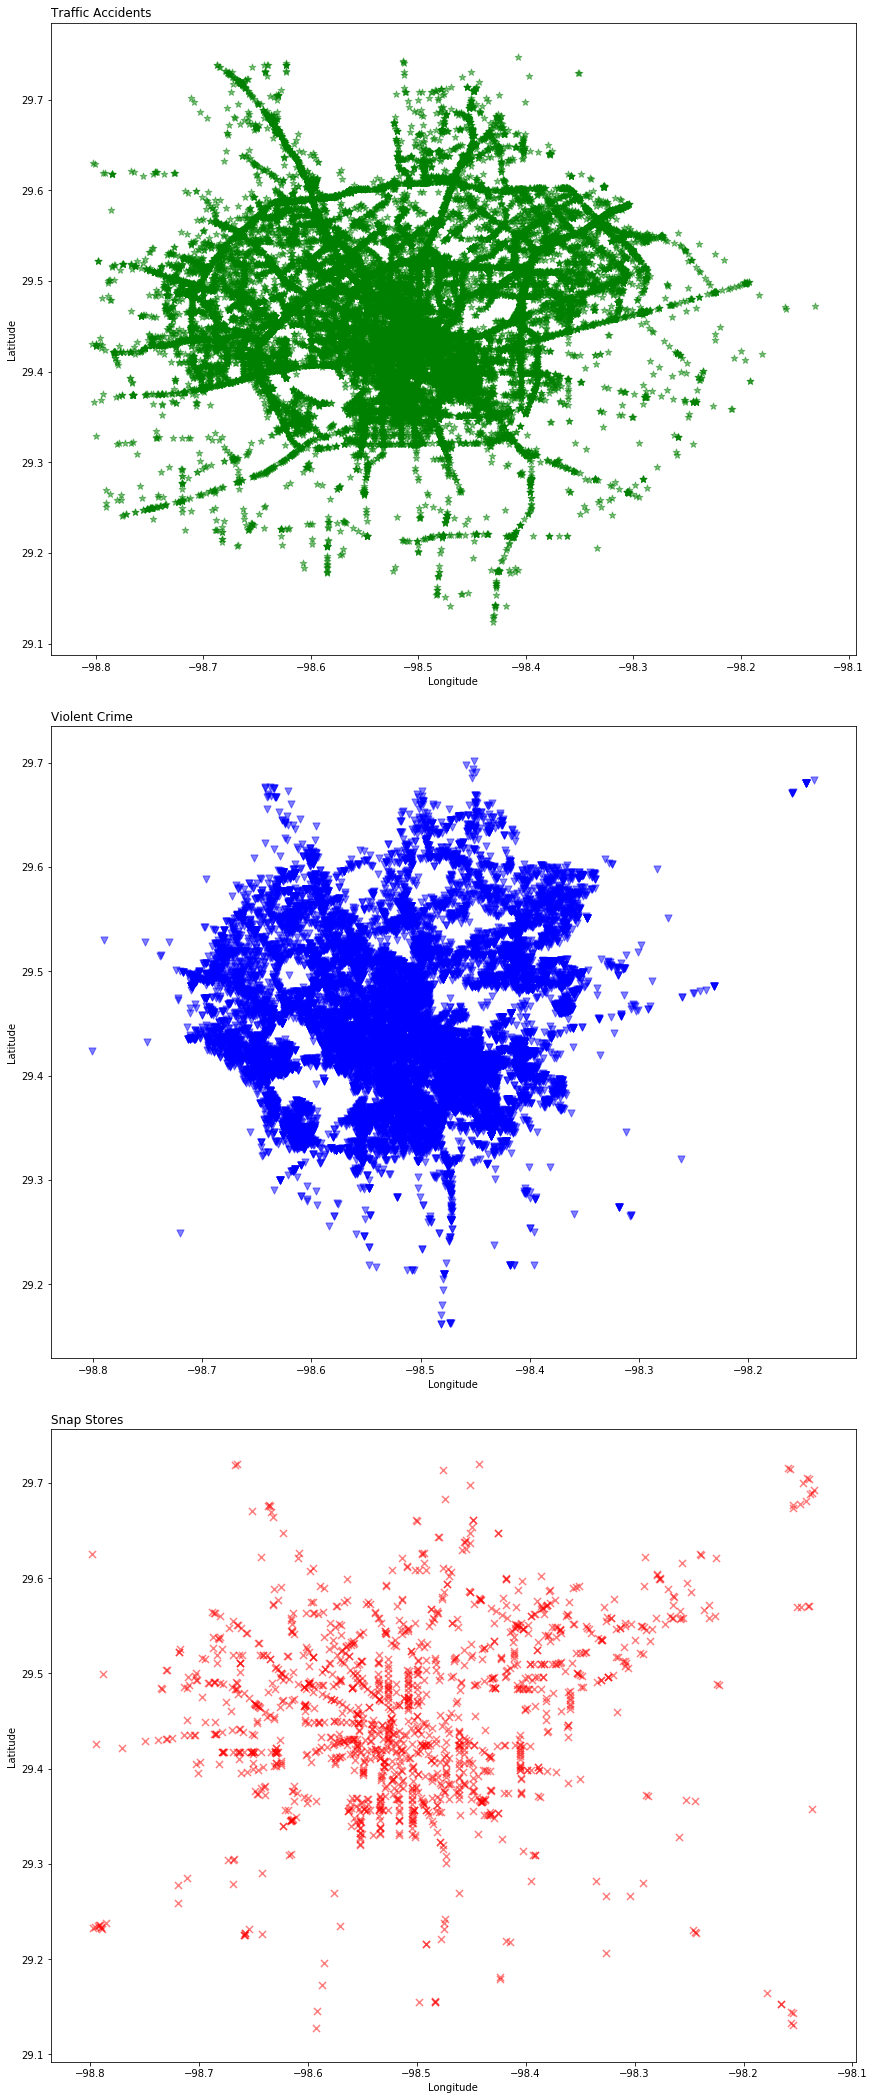

In [90]:
figure, axes = plt.subplots( figsize=(13,30), nrows=3, ncols=1)
figure.tight_layout(pad=5, h_pad=5, w_pad=5)
for ax in axes:
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
axes[0].set_title("Traffic Accidents", loc='left')
axes[1].set_title("Violent Crime", loc='left')
axes[2].set_title("Snap Stores",loc='left')

axes[0].scatter(x=t_accidents['lon'], y=t_accidents['lat'], color='green', marker='*', s=marker_size, label='Accidents', alpha=my_alpha)
axes[1].scatter(x=new_crime['lon'], y=new_crime['lat'], color='blue', marker='v', s=marker_size, label='Crime', alpha=my_alpha)
axes[2].scatter(x=new_snap['Longitude'], y=new_snap['Latitude'], color='red', marker='x', s=marker_size, label='Snap stores', alpha=my_alpha)


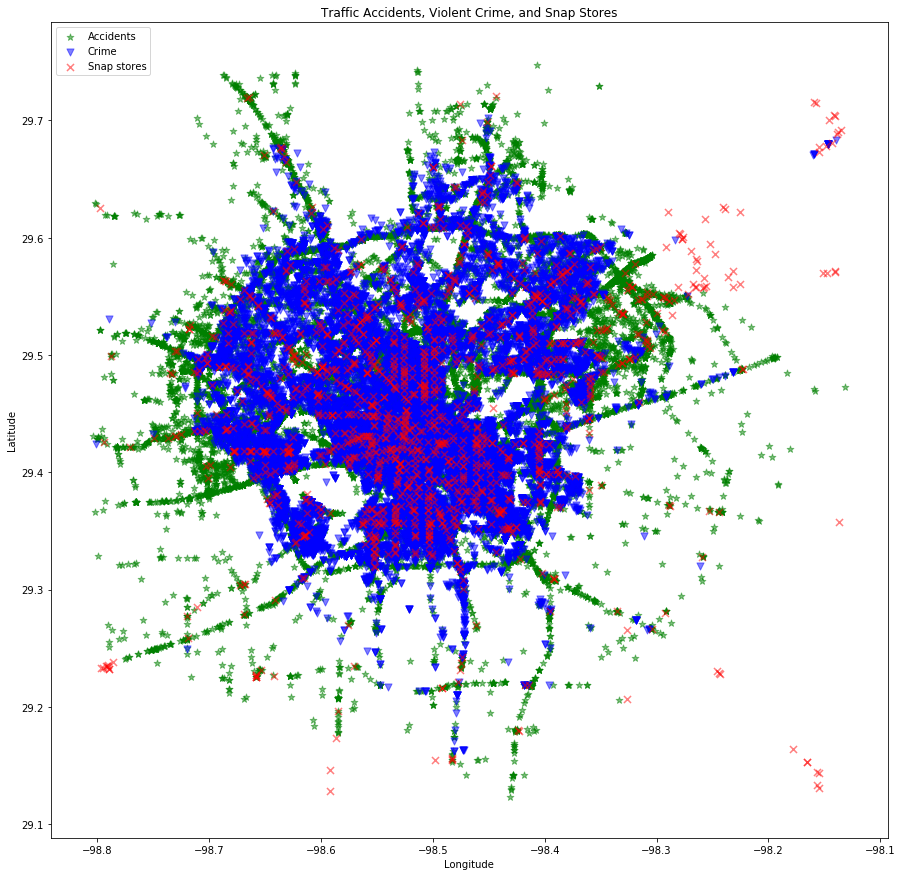

In [52]:

fig = plt.figure(figsize=figure_size)
ax1 = fig.add_subplot(111)
ax1.set_title("Traffic Accidents, Violent Crime, and Snap Stores")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.scatter(x=t_accidents['lon'], y=t_accidents['lat'], color='green', marker='*', s=marker_size, label='Accidents', alpha=my_alpha)
ax1.scatter(x=new_crime['lon'], y=new_crime['lat'], color='blue', marker='v', s=marker_size, label='Crime', alpha=my_alpha)
ax1.scatter(x=new_snap['Longitude'], y=new_snap['Latitude'], color='red', marker='x', s=marker_size, label='Snap stores', alpha=my_alpha)
plt.legend(loc='upper left')


In [75]:
#plt.style.use('seaborn-whitegrid')
#traffic_accidents.plot.scatter(x='lon', y='lat', c='red', s=10, marker='v', figsize=(12,3))
#plt.scatter(x=traffic_accidents['lon'], y=traffic_accidents['lat'], c='r',s=10, marker='v', figsize=(12,3))
#plt.scatter(x=violent_crime['lon'], y=violent_crime['lat'], c='b', s=5, marker='*')
